# Traceroute and Ping Web latency Analysis

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

We chose to analyse www.youtube.com, www.appstate.edu, www.ox.au.uk. Respectively that is Youtube, Applilachian State University, and Oxford University. Out favorite site, an American educational institution, and a European educational institution.

We ran a ping trial (60 pings) to all the routers on the path to our remote host 2 times during 5 different time periods (and 3 times during the 5th time period). We will use the following encoding to indicate which time period each ping was run in:

- 1 -> 7am-9am (07:00-09:00)       
     - EARLY MORNING
- 2 -> 10am-12pm (07:00-09:00)     
     - MID-MORNING
- 3 -> 2pm-5pm (14:00-16:00)       
     - MID-AFTERNOON
- 4 -> 6pm-8pm (18:00-20:00)      
    - EVENING
- 5 -> 10pm-6am (22:00-06:00)      
    - NIGHT

# Appalachian State University
- First we load in all of the relavent data, the dataframe are names using the convention:
institution_timePeriod_itteration

In [30]:
app_5_1 = pd.read_csv("appstate.edu_2021-03-16 00_01_25.567445_5.csv")
app_5_2 = pd.read_csv("appstate.edu_2021-03-16 00_02_25.388229_5.csv")
app_5_3 = pd.read_csv("appstate.edu_2021-03-16 00_16_25.270261_5.csv")

app_1_1 = pd.read_csv("appstate.edu_2021-03-16 08_01_25.621040_1.csv")
app_1_2 = pd.read_csv("appstate.edu_2021-03-16 08_16_26.505912_1.csv")

app_2_1 = pd.read_csv("appstate.edu_2021-03-16 11_01_26.157642_2.csv")
app_2_2 = pd.read_csv("appstate.edu_2021-03-16 11_16_25.132895_2.csv")

app_3_1 = pd.read_csv("appstate.edu_2021-03-16 14_31_25.888365_3.csv")
app_3_2 = pd.read_csv("appstate.edu_2021-03-16 14_46_25.966599_3.csv")

app_4_1 = pd.read_csv("appstate.edu_2021-03-16 19_01_26.019037_4.csv")
app_4_2 = pd.read_csv("appstate.edu_2021-03-16 19_16_25.406769_4.csv")
app = [app_5_1, app_5_2, app_5_3, 
       app_4_1, app_4_2,
      app_3_1, app_3_2,
      app_2_1, app_2_2,
      app_1_1, app_1_2]

All of the ping trial information can be viewed by printing out the contents of each dataframe.

In [37]:
app_4_1

,ip,received,min,avg,max,mdev
0,152.19.160.1,60,0.723,0.823,0.996,0.066
1,152.19.253.53,60,0.753,3.643,54.855,9.292
2,152.19.253.89,60,1.274,1.497,2.551,0.168
3,152.2.255.65,60,1.291,1.486,1.796,0.116
4,128.109.1.89,60,4.862,5.129,5.474,0.152
5,128.109.5.2,60,8.421,11.980,53.557,10.365
6,152.10.0.71,60,8.638,8.782,10.268,0.217


### Each colored line represent a separate ping trial - first analysis compares different router performances
#### (each time period has 2 ping trial, night period has 3 ping trials)
- Below we do some general observations before delving into the variation in delays over the course of different time periods


Text(0, 0.5, 'Average Delay (ms)')

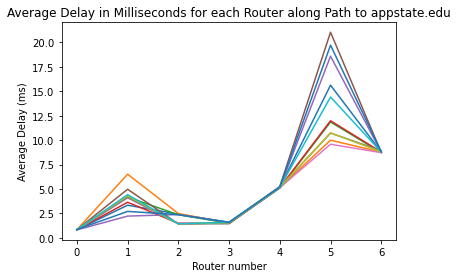

In [45]:
for i in app:
    plt.plot(list(range(i['avg'].shape[0])), i['avg'])
    
plt.title("Average Delay in Milliseconds for each Router along Path to appstate.edu")    
plt.xlabel("Router number")
plt.ylabel("Average Delay (ms)")

### Observations from the above graph:
#### Average Delay in Milliseconds for each Router along Path to appstate.edu
- At All 6 time points the average delay to get to the 0th, 3rd, 4th and 6th router is the same
- The routers with the most variation in average delay based on time is router #1 and #5
- Router #2, experiences some variation in average delay
#### Conclusion: 
- router 1 and 5 must be handling different amount of traffic at different times of the day, while 0,3,4,6 handle more consistant amount of traffic during the day

#### Interesting notes:
- each colored line represents a ping trial done at a specific time of the day (we will later show analysis based on time of day). 
    - Upon quick inspection, notice the purple line at router 1 and router 5. At router 1 there was the least delay and at router 5 it was the third highest delay. 
    - Now notice, the orange line, at route 1 it has the highest delay, and router 5 it has the second lowest delay. 
    - It is interesting to note that the average delays of router 1 and 5 seem to vary inversly with one another

Text(0, 0.5, 'Minimum Delay (ms)')

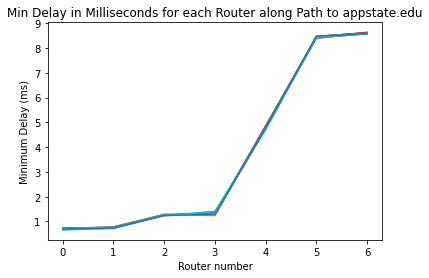

In [47]:
for i in app:
    plt.plot(list(range(i['min'].shape[0])), i['min'])
    
plt.title("Min Delay in Milliseconds for each Router along Path to appstate.edu")    
plt.xlabel("Router number")
plt.ylabel("Minimum Delay (ms)")

### Observations from the above graph:
#### Min Delay in Milliseconds for each Router along Path to appstate.edu
- At All 6 routers the minimum delay stayed pretty much the same during all 5 time periods
- there is a steap increase in delay from router 3 to 4 
##### conclusion: 
- min delay must be close to each router's peak performance
- the increase in delay from router 3 to 4 could be due to a jump in physical distance of the routers or just the difference minimum load that both routers tend to have

Text(0, 0.5, 'Maximum Delay (ms)')

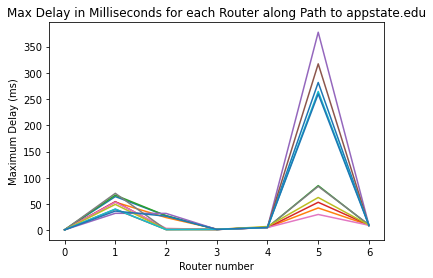

In [48]:
for i in app:
    plt.plot(list(range(i['max'].shape[0])), i['max'])
    
plt.title("Max Delay in Milliseconds for each Router along Path to appstate.edu")    
plt.xlabel("Router number")
plt.ylabel("Maximum Delay (ms)")

### Observations from the above graph:
#### Max Delay in Milliseconds for each Router along Path to appstate.edu
- At router 1 and 5 there seems to be the most variation in maximum delay
##### conclusion: 
- peak traffic must vary hugely at those two routers (1 and 5) throught the day

Text(0, 0.5, 'Standard deviation (ms)')

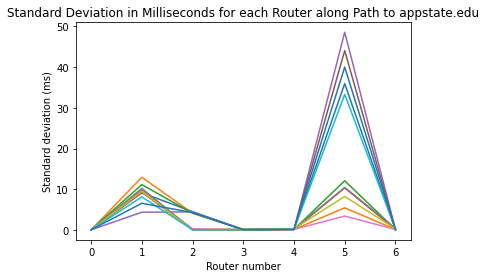

In [49]:
for i in app:
    plt.plot(list(range(i['mdev'].shape[0])), i['mdev'])
    
plt.title("Standard Deviation in Milliseconds for each Router along Path to appstate.edu")    
plt.xlabel("Router number")
plt.ylabel("Standard deviation (ms)")

### Observations from the above graph:
#### STD in Milliseconds for each Router along Path to appstate.edu
- At All 6 time points the std to get to the 0th, 3rd, 4th and 6th router is the same
- The routers with the most variation in average delay based on time is router #1 and #5
- Router #2, experiences some variation in std
- these observations align with the same patterns of average delay we observed in the first graph
#### Conclusion: 
- Because the standard deviations of the delay vary at the same times that the average and max delay increase for routers 1 and 5, we might assume that during high traffic times the speed at which a packet is transmitted is much more variable than at lower traffic times

#### Interesting notes:
- each colored line represents a ping trial done at a specific time of the day (we will later show analysis based on time of day). 
    - Upon quick inspection, notice the purple line at router 1 and router 5. At router 1 there was the least std and at router 5 it was the highest std. 
    - Now notice, the orange line, at route 1 it has the highest std, and router 5 it has the second lowest std. 
    - It is interesting to note that the std of router 1 and 5 seem to vary inversly with one another (similar to average delay)

### There was no loss of packets during any of the ping trails to App State.

## Now we compare performace at different time periods